Below is the code for the maximum-subarray problem

In [22]:
import math

def max_crossing_subarray(A, low, mid, high):
#     print("Finding cross sum : low, mid, high",low, mid, high)
    left_sum = -math.inf
    sum = 0

    for i in range(mid, low-1, -1):
        sum = sum + A[i]
        if sum > left_sum:
            left_sum = sum
            max_left = i
    right_sum = -math.inf
    sum = 0
    for j in range(mid + 1, high + 1):
        sum = sum + A[j]
        if sum > right_sum:
            right_sum = sum
            max_right = j
            
    return (max_left, max_right, left_sum + right_sum)

def maximum_subarray(A, low, high):
    
    if high == low:
        return (low, high, A[low])
    else: 
        mid = math.floor((low + high)/2)
        left_low, left_high, left_sum = maximum_subarray(A, low, mid)
        right_low, right_high, right_sum = maximum_subarray(A, mid + 1, high)
        cross_low, cross_high, cross_sum = max_crossing_subarray(A, low, mid, high)
        
        if left_sum >= right_sum and left_sum >= cross_sum:
            return (left_low, left_high, left_sum)
        elif right_sum >= left_sum and right_sum >= cross_sum:
            return (right_low, right_high, right_sum)
        else:
            return (cross_low, cross_high, cross_sum)
        


In [23]:
A = [13,-3,-25,20,-3,-16,-23,18,20,-7,12,-5,-22,15,-4,7]
low, high, sum_ = maximum_subarray(A, 0, len(A)-1)
print("low index :",low)
print("high index :",high)
print("Maximum sub Array sum :",sum_)

low index : 7
high index : 10
Maximum sub Array sum : 43


Plotting graph for actual time spent for maximum subarray algorithm vs list length(n) and theoritical time taken vs list length(n)

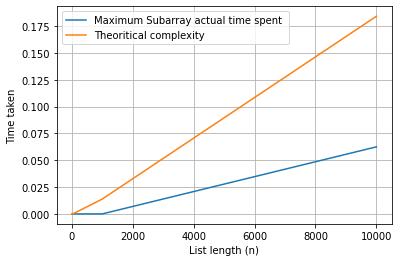

In [25]:
import time
import numpy as np
import matplotlib.pyplot as plt

c = 1/500000
lists = []
time_spent = []
y_list = []

for i in range(1,5):
    np.random.seed(12)
    
    n=10**i
    a = np.random.randint(-1000 * i, 1000 * i, n)
    start_time = time.process_time()
    maximum_subarray(a, 0, len(a)-1)
    end_time = time.process_time()
    
    lists.append(len(a))
    time_spent.append(end_time-start_time)
    y = c * n * np.log(n)
    y_list.append(y)
    
# print(lists)
# print(time_spent)
plt.xlabel('List length (n)')
plt.ylabel('Time taken')
plt.plot(lists, time_spent, label ='Maximum Subarray actual time spent ')
plt.plot(lists, y_list, label = "Theoritical complexity")
plt.grid()
plt.legend()
plt.show()

From the graph plotted for actual time spent vs list length(n) and theoritical time complexity vs list length(n), we can see that they have similar increasing pattern. The actual time is close to theoritical time so this indicates that the actual time complexity is indeed O(nlog(n)) as in theory.